## Sprint 3

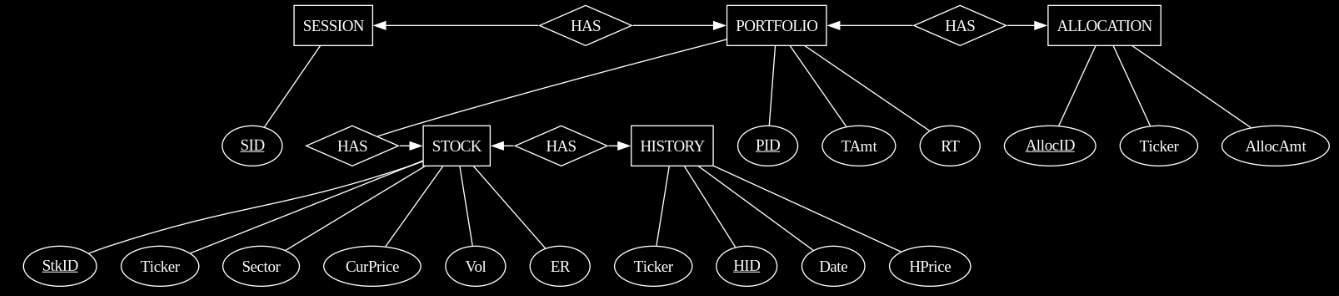

### Advanced Conceptual Design

1. [x] **Completeness**: Ensuring all necessary information and relationships for the system requirements are captured in the ERD.

2. [x] **Correctness**: The ERD accurately represents the intended real-world relationships and constraints.

3. [x] **Minimality**: Eliminating redundant attributes and relationships to ensure no unnecessary repetition.

4. [x] **Expressiveness**: The ERD should be detailed enough to convey all essential information and relationships clearly.

5. [x] **Readability**: The ERD should be easy to read and understand, with a logical and organized structure.

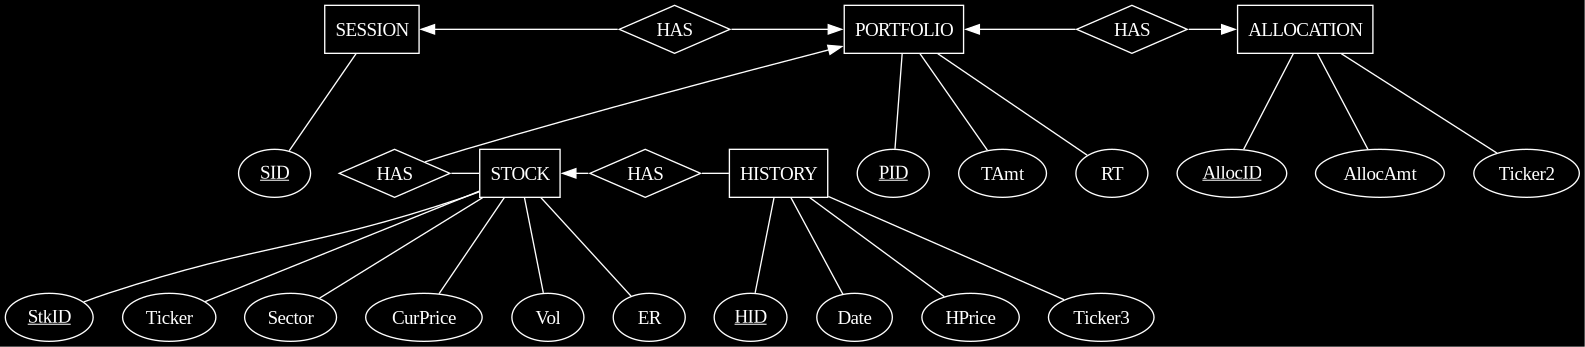

In [2]:
# Create ERD

from graphviz import Digraph

# Create a new directed graph
dot1 = Digraph(comment='ERD2')

# Set graph attributes for a black background and white nodes and edges
dot1.attr(bgcolor='black')
dot1.attr('node', color='white', fontcolor='white', style='filled', fillcolor='black')
dot1.attr('edge', color='white')
dot1.attr('graph', ranksep='1', nodesep='0.3')  # Reduced nodesep

# Add main entity nodes with shortened names
dot1.node('SSN', 'SESSION', shape='rectangle')
dot1.node('S', 'STOCK', shape='rectangle')
dot1.node('P', 'PORTFOLIO', shape='rectangle')
dot1.node('A', 'ALLOCATION', shape='rectangle')
dot1.node('H', 'HISTORY', shape='rectangle')

# Add relationship nodes
dot1.node('H1', 'HAS', shape='diamond')
dot1.node('H2', 'HAS', shape='diamond')
dot1.node('H3', 'HAS', shape='diamond')
dot1.node('H4', 'HAS', shape='diamond')

# Add subgraph for organizing nodes horizontally
with dot1.subgraph() as s:
    s.attr(rank='same')
    s.node('SSN')
    s.node('P')
    s.node('A')
    s.node('H1')
    s.node('H3')

with dot1.subgraph() as s2:
    s2.attr(rank='same')
    s2.node('S')
    s2.node('H')
    s2.node('H2')
    s2.node('H4')

# Add relationship edges
dot1.edge('SSN', 'H1', dir='back')
dot1.edge('H1', 'P')

dot1.edge('P', 'H2', dir='back')
dot1.edge('H2', 'S', arrowhead='none')

dot1.edge('P', 'H3', dir='back')
dot1.edge('H3', 'A')

dot1.edge('S', 'H4', dir='back')
dot1.edge('H4', 'H', arrowhead='none')

# Add attribute edges (separate nodes for each attribute)
# Session
dot1.node('SID', '<<u>SID</u>>', shape='ellipse')
dot1.edge('SSN', 'SID', arrowhead='none')

# Stock
dot1.node('StkID', '<<u>StkID</u>>', shape='ellipse')
dot1.node('Ticker', 'Ticker', shape='ellipse')
dot1.node('Sector', 'Sector', shape='ellipse')
dot1.node('CurP', 'CurPrice', shape='ellipse')  # CurrentPrice
dot1.node('Vol', 'Vol', shape='ellipse')  # Volatility
dot1.node('ER', 'ER', shape='ellipse')  # ExpectedReturn
dot1.edge('S', 'StkID', arrowhead='none')
dot1.edge('S', 'Ticker', arrowhead='none')
dot1.edge('S', 'Sector', arrowhead='none')
dot1.edge('S', 'CurP', arrowhead='none')
dot1.edge('S', 'Vol', arrowhead='none')
dot1.edge('S', 'ER', arrowhead='none')

# Portfolio
dot1.node('PID', '<<u>PID</u>>', shape='ellipse')
dot1.node('TAmt', 'TAmt', shape='ellipse')  # TotalAmount
dot1.node('RT', 'RT', shape='ellipse')  # RiskTolerance
dot1.edge('P', 'PID', arrowhead='none')
dot1.edge('P', 'TAmt', arrowhead='none')
dot1.edge('P', 'RT', arrowhead='none')

# Allocation
dot1.node('AllocID', '<<u>AllocID</u>>', shape='ellipse')
## dot1.node('Ticker2', 'Ticker', shape='ellipse')  # StockID
dot1.node('AllocAmt', 'AllocAmt', shape='ellipse')  # AllocatedAmount
dot1.edge('A', 'AllocID', arrowhead='none')
dot1.edge('A', 'Ticker2', arrowhead='none')
dot1.edge('A', 'AllocAmt', arrowhead='none')

# Stock History
## dot1.node('Ticker3', 'Ticker', shape='ellipse')  # History
dot1.node('HID', '<<u>HID</u>>', shape='ellipse')  # HistStockID
dot1.node('Date', 'Date', shape='ellipse')
dot1.node('HPrice', 'HPrice', shape='ellipse')  # HistPrice
dot1.edge('H', 'HID', arrowhead='none')
dot1.edge('H', 'Ticker3', arrowhead='none')
dot1.edge('H', 'Date', arrowhead='none')
dot1.edge('H', 'HPrice', arrowhead='none')

# Render the graph
dot1.render('ERD2', format='png', cleanup=False)

# Display the graph inline in Jupyter Notebook (for Jupyter only)
from IPython.display import Image
Image(filename='ERD2.png')